In [5]:
from IPython.display import display, HTML # type:ignore
style = '<style> body { font-family: Times New Roman; font-size: 16px; } </style>'
display(HTML(style))

# <div style="font-family: fantasy;">Introduction</div>
Support Vector Machine is a powerful machine learning model capable of performing linear non linear classification regression and outlier detection
### <div style="font-family: fantasy;">Hard-margin SVM</div>
The general equation of SVM is 
$$
\vec{w} \cdot \vec{x} - b = \hat{y}
$$
$where \ y = {-1,0,1}$
$\vec{w}$ is the normal vector and $\vec{x}$ is the vector of parameters or features every element in $\vec{x}$ is an instance containing the array of values corresponding to each feature
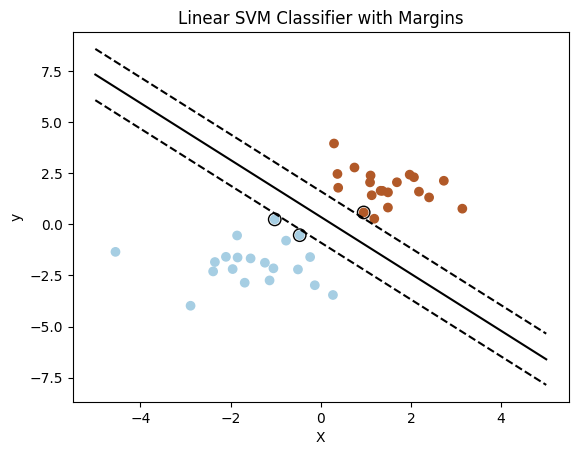

Here we have the decision boundary (bold line) and the margins (dashed lines) the lower dashed line corresponds to y=-1 and upper dashed line y=1 and the decision boundary corresponds to y=0.\
the principle here is we classify the data with instance x as positive class if it have y>=1 and negative if y<=-1. Also note that the points through which the margin goes those are the special vectors called as the support vectors.\
Our motive is to maximize the distance of margin from decision boundary while maintaining the conditions.
_equation of the margin_\
Note that the margins are || to the boundary thus,\
equation of the margin can be

$
\text{from}\\ 
\vec{w} \cdot \vec{x} - b = 0 (\text{equation for the decision boundary})\\
\text{the equation of the upper margin can be, }\\
\vec{w} \cdot (\vec{x}+k \frac{\vec{w}}{ |\vec{w}| }) - b = 1\\
k \frac{\vec{w}}{ |\vec{w}| } \text{this parameter should lie on margin},\\
\text{now to maximize distance we maximize k} \\
\text{using the equation for the decision boundary},\\
\vec{w}\cdot \frac{\vec{w}}{ |\vec{w}| } = 1\\
or, k = \frac{1}{ |\vec{w}| }\\
\text{Thus we need to minimize} |\vec{w}| \\
\text{now we have few constraints},\\
\vec{w}\cdot\vec{x} - b >= 1 \ if \ y = 1 \\
\vec{w}\cdot\vec{x} - b <= 1 \ if \ y = -1 \\
\text{or, we can say}\\
y(\vec{w}\cdot\vec{x}-b)>=1 \ \forall \vec{x} \ \text{and} \ y
$\
Now till here it was for Hard margin SVM that is ideal case as you can see from diagram the classes as perfectly separated without any outliers or errors like false positive or true negative but in real datasets we don't have such previledge thus we softmargin SVM

---
### <div style="font-family:fantasy;">soft-margin SVM</div>
Now here we assign penalties for the datapoints based on the distance from the margin if they are in the wrong class or lying btwn the margins

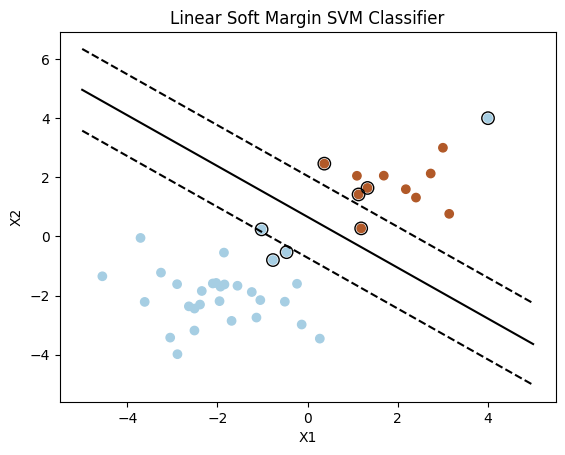

now this penalty is calculated by a LOSS function called hinge loss \
$
\text{HINGE LOSS} = max(0,1-y_i(\vec{w}\cdot\vec{x_i} - b))\\
\vec{w}\cdot\vec{x_i} - b \ \text{this is called the score}
$
Now let us analyze this with all the 4 cases\
$
\begin{array}{|c|c|}
\hline
\begin{aligned}
\text{CASE 1: True positive} \\
y=1 \text{ and }score>1 \\
max(0,1-1(score)) [\text{ where } score>1] = 0
\end{aligned}
&
\begin{aligned}
\text{CASE 2: True negative} \\
y=1 \text{ and }score<1 \\
max(0,1-1(score)) [\text{ where } score < -1] = LOSS \ | \ LOSS > 1
\end{aligned} \\
\hline
\begin{aligned}
\text{CASE 3:False positve} \\
y=-1 \text{ and }score > 1 \\
max(0,1-(-1)(score)) [\text{ where } score > 1] = LOSS \text{ | LOSS > 1}
\end{aligned}
&
\begin{aligned}
\text{CASE 4: False negative} \\
y=-1 \text{ and }score < -1 \\
max(0,1-(-1)(score)) [\text{ where } score < -1] = 0
\end{aligned} \\
\hline
\end{array}
$

**special outlier case**
there can also be an outlier case such that the point is true positive (or false negative in this case) but have crossed the margin\
$-1 < \vec{w}\cdot\vec{x} -b < 0$\
which gives,\
$ LOSS = max(0,1-y(score)) \text{ where y=-1 and  -1 < score < 0}\\
=>LOSS = max(0,1-(-1)(score))\\
=>0<LOSS<1
$\
Thus loss is not 0 but less than 1\
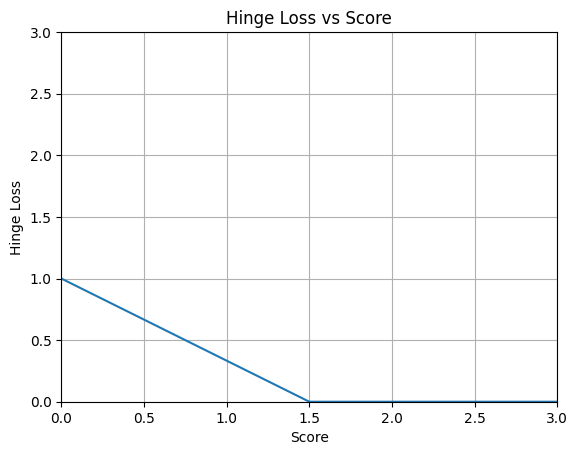\
Here is the graph btwn score and hinge loss as u can notice it depicts the proerties discussed above 

# <div style="font-family: fantasy;"> Linear SVM Classification</div>
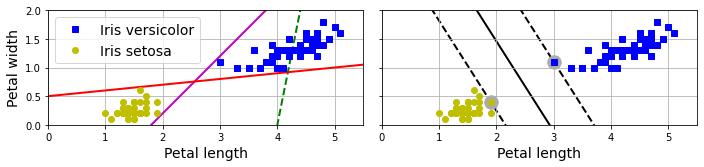\
left plot showss decision boundaries of three possible linear classfiers. But the problem is the boundaries are so close to the instances that they will perform hardly good on new instances. Thus our motive is to increase the gap between the instance and boundary via some margin. Consider it as fitting the largest possible street with distance between the margin and boundary as large as possible. This is called large margin classification.\
Note that adding more training instances off the street will not affect the decision boundary at all: it is fully determined by the instances on the edge of the street. These instances are called the support vectors.\
SVMs are sensitive to the feature scale. Thus it is a good habit to scale the features using ```StandrdScaler```.

### <div style="font-family: fantasy;"> Soft margin classification</div>
If we strictly impose all the instances be off the street and on the right side, this is called *hard margin classification*. There are two main issues with hard margin classification.
* it works only if the data is clearly linearly separable 
* it is quite snesitive to outliers

Thus we use more practical and flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the *margin violation*(i.e instances that end up in the middle of the street or even on the wrong side). This is called *soft margin*.\
In sklearn's SVM classes we can control the balance using C hyperparameter.
* small C -> more margin violation but wider street.
* large C -> less margin violation but narrow street.

Thus $C \propto \frac{1}{width} $. Thus to reduce overfitting we reduce C and to reduce underfitting we increase C

In [105]:
import numpy as np
from sklearn import datasets
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris.data[2:4][:]
X

array([[4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

# <div style="font-family: fantasy;"> Non-Linear SVM Classification</div>
One approach to handle nonlinear dataset is to add more features and in some cases this can lead to a linear dataset.

In [106]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
poly_svm = Pipeline((
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=1,loss="hinge"))
))
poly_svm.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

### <div style="font-family: fantasy;"> Polynomial kernel</div>
It makes it possible to get same results as you added many polynomial features even with high degree polynomial features even with high degree polynomial features without actually adding them. So there are no excess features to make the model slow.

In [107]:
from sklearn.svm import SVC
poly_clf = Pipeline((
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))
))
poly_clf.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

```coef0``` controls how much the model is influenced by high degree polynomial vs low degree polynomial
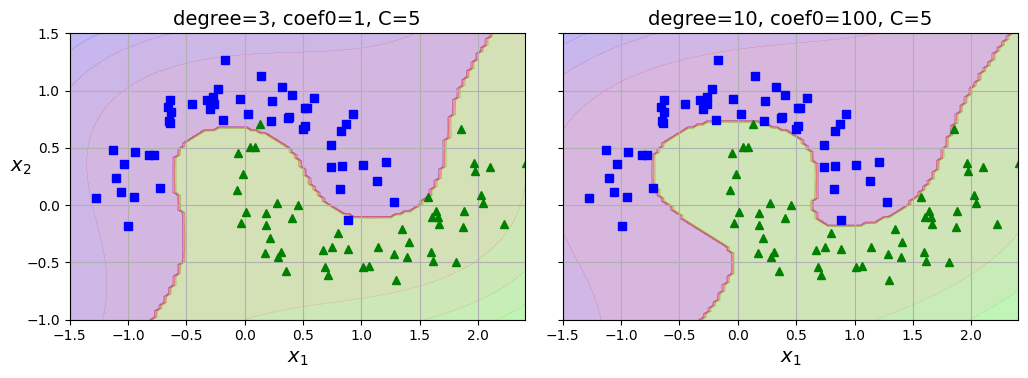

### <div style="font-family: fantasy;"> Adding Similarity features</div>
adding features computed using similarity function that measures how much ease instance resembles a particular landmark.
Here we are using Gaussian Radial Bias function as the similarity function
$$\phi \gamma (\boldsymbol X,l) = e^{(-\gamma||\boldsymbol X - l||^2)}$$
It is a bell shaped function varying from 0 to .0 for very far from landmark and 1 for at the landmark.
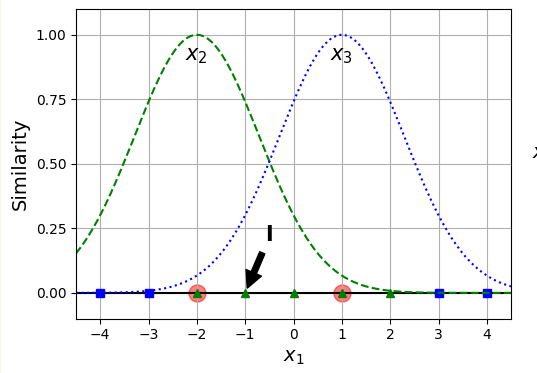\
if $l$ is at d1 from $x_1$ and d2 from $x_2$ then the new features derived from $l$ are
$$
x_1 = e^{\gamma |d1|^2}\\
x_2 = e^{\gamma |d2|^2}\\
$$ 
A simple approach for selection of landmarks is to select landmark at each instance of the dataset\
<u>limitation:</u> it may lead to a very large number of features

### <div style="font-family: fantasy;"> Gaussian RBF Kernel</div>
It makes it possible to obtain a similar result as if youhad added many similarity features without actually adding them

In [108]:
svc_kernel = Pipeline((
    ('scaler',StandardScaler()),
    ('svc_clf',SVC(kernel='rbf',gamma=0.5,C=0.001))
))
svc_kernel.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc_clf', SVC(C=0.001, gamma=0.5))])

* increasing $\gamma$ makes the curve narrow resulting in each instance range of influence small. Decision boundary is more irregular hence prone to overfit.
* thus $\gamma$ is the regularization parameter

# <div style="font-family: fantasy;"> SVM Regression</div>
here the objective is just reverse of the classifier. Here it is to fit as many instances as possible on the width of street while limiting the margin violations. The width is controlled by $\epsilon , \epsilon \propto width$. Now this model is $\epsilon$ insensitive as adding more training instances within the margin doesnot affect the model's prediction


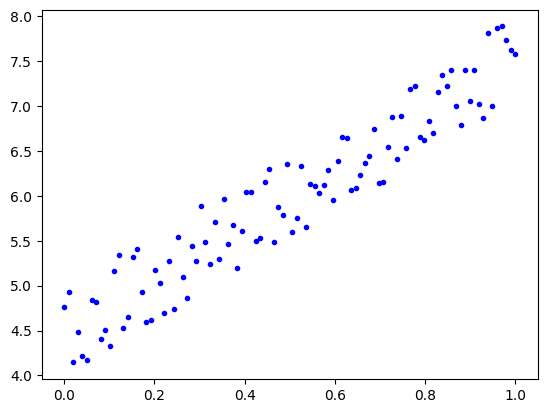

In [109]:
import matplotlib.pyplot as plt
m = 100  # number of instances
n = 1 # number of features
X = np.linspace(0,1,100).reshape(m,n)
y = 3*X + 4 + np.random.rand(m,n).reshape(m,n)
plt.plot(X,y,'b.')

In [110]:
from sklearn.svm import LinearSVR


linear_svr = Pipeline((
    ('scaler',StandardScaler()),
    ('svm_reg',LinearSVR(epsilon=1.5))
))
linear_svr.fit(X,y.ravel())


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(epsilon=1.5))])

In [111]:
X_pred = np.linspace(0,1,100).reshape(100,1)


In [112]:
y_pred = linear_svr.predict(X_pred)
y_pred

array([3.4163021 , 3.44724032, 3.47817853, 3.50911675, 3.54005497,
       3.57099318, 3.6019314 , 3.63286961, 3.66380783, 3.69474605,
       3.72568426, 3.75662248, 3.78756069, 3.81849891, 3.84943713,
       3.88037534, 3.91131356, 3.94225177, 3.97318999, 4.00412821,
       4.03506642, 4.06600464, 4.09694286, 4.12788107, 4.15881929,
       4.1897575 , 4.22069572, 4.25163394, 4.28257215, 4.31351037,
       4.34444858, 4.3753868 , 4.40632502, 4.43726323, 4.46820145,
       4.49913966, 4.53007788, 4.5610161 , 4.59195431, 4.62289253,
       4.65383074, 4.68476896, 4.71570718, 4.74664539, 4.77758361,
       4.80852182, 4.83946004, 4.87039826, 4.90133647, 4.93227469,
       4.9632129 , 4.99415112, 5.02508934, 5.05602755, 5.08696577,
       5.11790398, 5.1488422 , 5.17978042, 5.21071863, 5.24165685,
       5.27259506, 5.30353328, 5.3344715 , 5.36540971, 5.39634793,
       5.42728614, 5.45822436, 5.48916258, 5.52010079, 5.55103901,
       5.58197722, 5.61291544, 5.64385366, 5.67479187, 5.70573

In [113]:
linear_svr[-1].epsilon

1.5

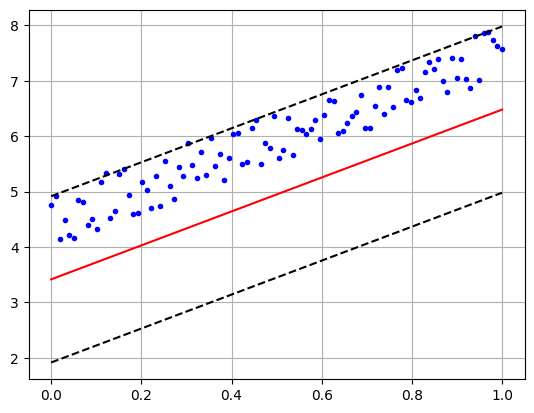

In [114]:
plt.plot(X,y,'b.')
plt.plot(X_pred,y_pred,'r-')
plt.plot(X_pred, y_pred + linear_svr[-1].epsilon, "k--")
plt.plot(X_pred, y_pred - linear_svr[-1].epsilon, "k--")
plt.grid()

for non linear regression we can use kernel trick where regularization is out by the C value 
$C \propto regularization$

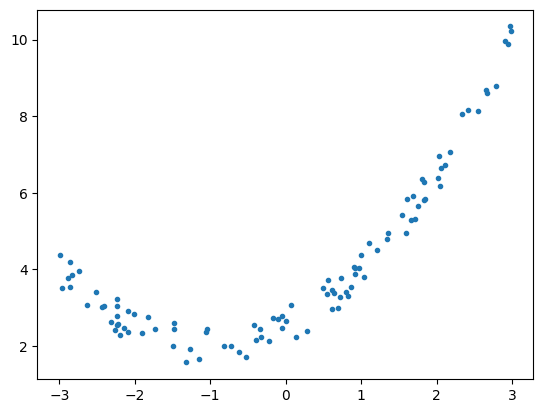

In [115]:
# polynomial regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
X = 6*np.random.rand(m,n) - 3
y = 0.5 * (X**2) + X + 2 + np.random.rand(m,n)
plt.plot(X,y,'.')

In [116]:
sv_poly_kernel = Pipeline((
    ('scaler',StandardScaler()),
    ('svm_reg',SVR(kernel='poly',degree=2,C=0.1,epsilon=0.1))
))
sv_poly_kernel.fit(X,y.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', SVR(C=0.1, degree=2, kernel='poly'))])

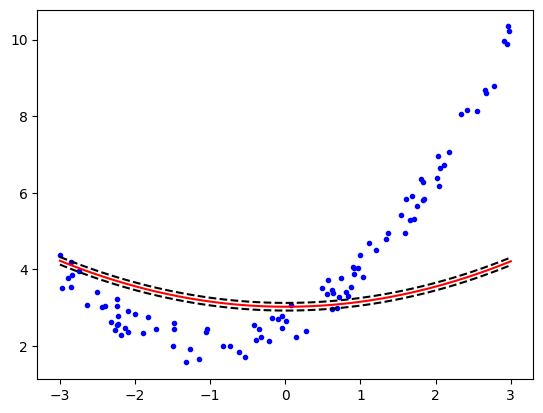

In [117]:
X_pred = np.linspace(-3, 3, 100) # generate an array with 100 instance each of values between -3 and 3 both inclusive
X_pred = X_pred.reshape(100,1) #converting to matrix of 100 rows and 1 column
y_pred = sv_poly_kernel.predict(X_pred)
plt.plot(X,y,'b.')
plt.plot(X_pred,y_pred,'r-')
plt.plot(X_pred,y_pred+sv_poly_kernel[-1].epsilon,'k--')
plt.plot(X_pred,y_pred-sv_poly_kernel[-1].epsilon,'k--')

# <div style="font-family:'fantasy';">Mathematical Drivers of SVM and SVM Kernels</div>
### <div style="font-family:'fantasy';">SVM Dual</div>
<u>primal svm problem</u>:\
$
^{min}_{\vec{w},\vec{b}}\frac{1}{2}||\vec{w}||^2 \text{ such that } y_i(\vec{w^T}\cdot \vec{x_{(i)}}-b)>=1
$\
as we are trying to maximize the margin thus we are trying to minimize $||\vec{w}||$\
we now convert the primal to dual formulation. Before that let's learn about $Lagragian$ which will be an useful prerequisite.\
<u>Lagragian</u>:
$$
\begin{array}{|c|c|}
\hline
L(\vec{w},\vec{b},\alpha ) = \frac{1}{2}\cdot \vec{w}\cdot \vec{w^T} - \sum_{i=1}^{n}(y_i(\vec{w^T}\cdot \vec{x_i} - \vec{b})-1)\\
\hline
\end{array}
$$
Here $\alpha_i$ is the lagragian vector of $i^{th}$ datapoint.\
$
\text{the equivalent dual problem is}\\
$
$
^{max}_{\alpha_i>=0}[min_{\vec{w},\vec{b}}L(\vec{w},\vec{b},\alpha)]\\
$
### <div style="font-family:'fantasy';">Stationarity constraint</div>
